## Chapater 2 Code - Python 3 version

### abaloneCorrHeat.py

                  Length  Diameter    Height  Whole weight  Shucked weight  \
Length          1.000000  0.986812  0.827554      0.925261        0.897914   
Diameter        0.986812  1.000000  0.833684      0.925452        0.893162   
Height          0.827554  0.833684  1.000000      0.819221        0.774972   
Whole weight    0.925261  0.925452  0.819221      1.000000        0.969405   
Shucked weight  0.897914  0.893162  0.774972      0.969405        1.000000   
Viscera weight  0.903018  0.899724  0.798319      0.966375        0.931961   
Shell weight    0.897706  0.905330  0.817338      0.955355        0.882617   
Rings           0.556720  0.574660  0.557467      0.540390        0.420884   

                Viscera weight  Shell weight     Rings  
Length                0.903018      0.897706  0.556720  
Diameter              0.899724      0.905330  0.574660  
Height                0.798319      0.817338  0.557467  
Whole weight          0.966375      0.955355  0.540390  
Shucked weig

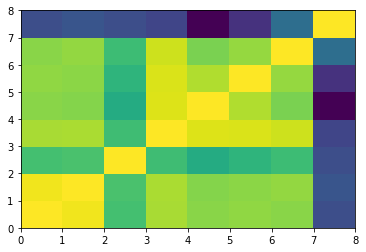

In [1]:
__author__ = 'mike_bowles'
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plot
%matplotlib inline

target_url = ("http://archive.ics.uci.edu/ml/machine-"
              "learning-databases/abalone/abalone.data")
#read abalone data
abalone = pd.read_csv(target_url,header=None, prefix="V")
abalone.columns = ['Sex', 'Length', 'Diameter', 'Height',
                   'Whole weight', 'Shucked weight',
                   'Viscera weight', 'Shell weight', 'Rings']

#calculate correlation matrix
corMat = DataFrame(abalone.iloc[:,1:9].corr())
#print correlation matrix
print(corMat)

#visualize correlations using heatmap
plot.pcolor(corMat)
plot.show()





### abaloneParallelPlot.py

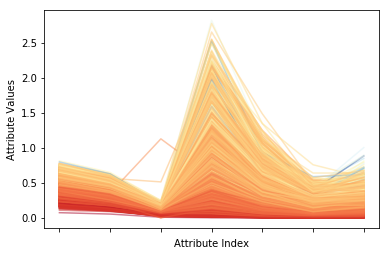

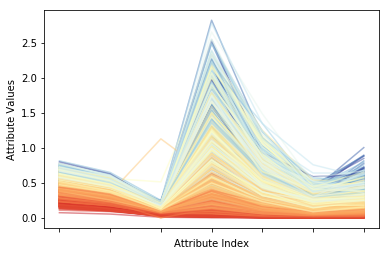

In [2]:
__author__ = 'mike_bowles'
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plot
from math import exp
target_url = ("http://archive.ics.uci.edu/ml/machine-"
              "learning-databases/abalone/abalone.data")
#read abalone data
abalone = pd.read_csv(target_url,header=None, prefix="V")
abalone.columns = ['Sex', 'Length', 'Diameter', 'Height',
                   'Whole Wt', 'Shucked Wt',
                   'Viscera Wt', 'Shell Wt', 'Rings']
#get summary to use for scaling
summary = abalone.describe()
minRings = summary.iloc[3,7]
maxRings = summary.iloc[7,7]
nrows = len(abalone.index)

for i in range(nrows):
    #plot rows of data as if they were series data
    dataRow = abalone.iloc[i,1:8]
    labelColor = (abalone.iloc[i,8] - minRings) / (maxRings - minRings)
    dataRow.plot(color=plot.cm.RdYlBu(labelColor), alpha=0.5)

plot.xlabel("Attribute Index")
plot.ylabel(("Attribute Values"))
plot.show()

#renormalize using mean and standard variation, then compress
# with logit function

meanRings = summary.iloc[1,7]
sdRings = summary.iloc[2,7]

for i in range(nrows):
    #plot rows of data as if they were series data
    dataRow = abalone.iloc[i,1:8]
    normTarget = (abalone.iloc[i,8] - meanRings)/sdRings
    labelColor = 1.0/(1.0 + exp(-normTarget))
    dataRow.plot(color=plot.cm.RdYlBu(labelColor), alpha=0.5)

plot.xlabel("Attribute Index")
plot.ylabel(("Attribute Values"))
plot.show()

### abaloneSummary.py

  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  
     Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.

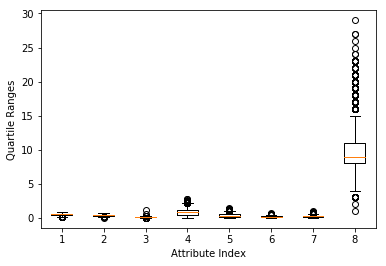

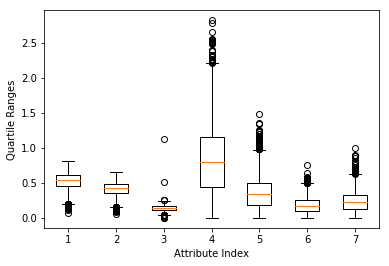

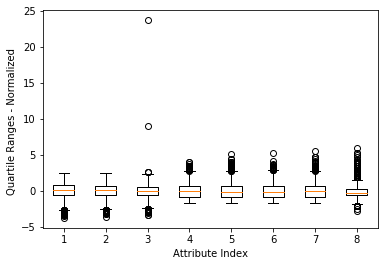

In [3]:
__author__ = 'mike_bowles'
import pandas as pd
from pandas import DataFrame
from pylab import *
import matplotlib.pyplot as plot

target_url = ("http://archive.ics.uci.edu/ml/machine-"
              "learning-databases/abalone/abalone.data")
#read abalone data
abalone = pd.read_csv(target_url,header=None, prefix="V")
abalone.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
                   'Shucked weight', 'Viscera weight', 'Shell weight',
                   'Rings']


print(abalone.head())
print(abalone.tail())

#print summary of data frame
summary = abalone.describe()
print(summary)

#box plot the real-valued attributes
#convert to array for plot routine
array = abalone.iloc[:,1:9].values
boxplot(array)
plot.xlabel("Attribute Index")
plot.ylabel(("Quartile Ranges"))
show()

#the last column (rings) is out of scale with the rest
# - remove and replot
array2 = abalone.iloc[:,1:8].values
boxplot(array2)
plot.xlabel("Attribute Index")
plot.ylabel(("Quartile Ranges"))
show()

#removing is okay but renormalizing the variables generalizes better.
#renormalize columns to zero mean and unit standard deviation
#this is a common normalization and desirable for other operations
# (like k-means clustering or k-nearest neighbors
abaloneNormalized = abalone.iloc[:,1:9]


for i in range(8):
    mean = summary.iloc[1, i]
    sd = summary.iloc[2, i]
    abaloneNormalized.iloc[:,i:(i + 1)] = (
                    abaloneNormalized.iloc[:,i:(i + 1)] - mean) / sd

array3 = abaloneNormalized.values
boxplot(array3)
plot.xlabel("Attribute Index")
plot.ylabel(("Quartile Ranges - Normalized "))
show()

### classifierExamplePlot.py

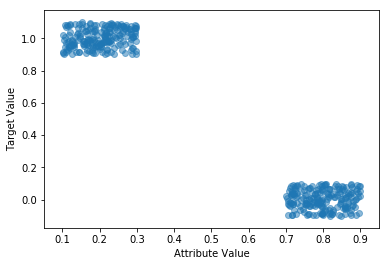

In [4]:
__author__ = 'mike_bowles'

import matplotlib.pyplot as plot
from random import uniform

#Simulate easy to classify examples

x = []
target = []
for i in range(200):
    #make up easy data points
    x.append(0.2 + uniform(-0.1, 0.1))
    target.append(1.0 + uniform(-0.1, 0.1))
    x.append(0.8 + uniform(-0.1, 0.1))
    target.append(0.0 + uniform(-0.1, 0.1))


plot.scatter(x, target, alpha=0.5)

plot.xlabel("Attribute Value")
plot.ylabel("Target Value")
plot.show()

### corrCalc.py

In [5]:
__author__ = 'mike_bowles'
import pandas as pd
from pandas import DataFrame
from math import sqrt
import sys
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-"
"databases/undocumented/connectionist-bench/sonar/sonar.all-data")

#read rocks versus mines data into pandas data frame
rocksVMines = pd.read_csv(target_url,header=None, prefix="V")

#calculate correlations between real-valued attributes
dataRow2 = rocksVMines.iloc[1,0:60]
dataRow3 = rocksVMines.iloc[2,0:60]
dataRow21 = rocksVMines.iloc[20,0:60]

mean2 = 0.0; mean3 = 0.0; mean21 = 0.0
numElt = len(dataRow2)
for i in range(numElt):
    mean2 += dataRow2[i]/numElt
    mean3 += dataRow3[i]/numElt
    mean21 += dataRow21[i]/numElt

var2 = 0.0; var3 = 0.0; var21 = 0.0
for i in range(numElt):
    var2 += (dataRow2[i] - mean2) * (dataRow2[i] - mean2)/numElt
    var3 += (dataRow3[i] - mean3) * (dataRow3[i] - mean3)/numElt
    var21 += (dataRow21[i] - mean21) * (dataRow21[i] - mean21)/numElt

corr23 = 0.0; corr221 = 0.0
for i in range(numElt):
    corr23 += (dataRow2[i] - mean2) * \
              (dataRow3[i] - mean3) / (sqrt(var2*var3) * numElt)
    corr221 += (dataRow2[i] - mean2) * \
               (dataRow21[i] - mean21) / (sqrt(var2*var21) * numElt)

sys.stdout.write("Correlation between attribute 2 and 3 \n")
print(corr23)
sys.stdout.write(" \n")

sys.stdout.write("Correlation between attribute 2 and 21 \n")
print(corr221)
sys.stdout.write(" \n")

Correlation between attribute 2 and 3 
0.7709381211911223
 
Correlation between attribute 2 and 21 
0.46654808078868865
 


### corrPlot.py

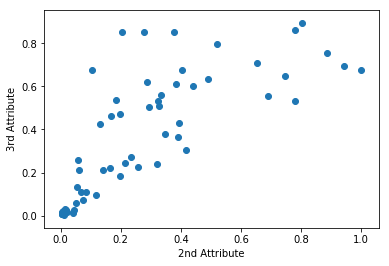

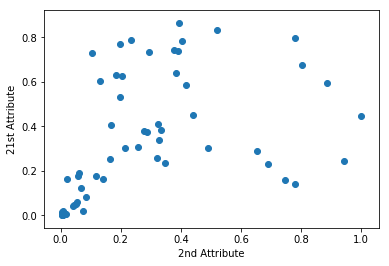

In [6]:
__author__ = 'mike_bowles'
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plot
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-"
"databases/undocumented/connectionist-bench/sonar/sonar.all-data")

#read rocks versus mines data into pandas data frame
rocksVMines = pd.read_csv(target_url,header=None, prefix="V")

#calculate correlations between real-valued attributes
dataRow2 = rocksVMines.iloc[1,0:60]
dataRow3 = rocksVMines.iloc[2,0:60]

plot.scatter(dataRow2, dataRow3)


plot.xlabel("2nd Attribute")
plot.ylabel(("3rd Attribute"))
plot.show()

dataRow21 = rocksVMines.iloc[20,0:60]

plot.scatter(dataRow2, dataRow21)


plot.xlabel("2nd Attribute")
plot.ylabel(("21st Attribute"))
plot.show()

### glassCorrHeatMap.py

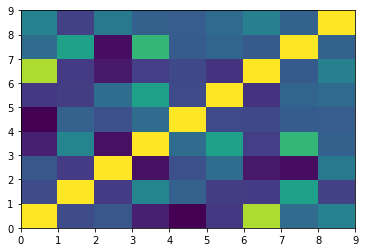

In [7]:
__author__ = 'mike_bowles'
import pandas as pd
from pandas import DataFrame
from pylab import *
import matplotlib.pyplot as plot
from math import exp

target_url = ("https://archive.ics.uci.edu/ml/machine-"
              "learning-databases/glass/glass.data")
glass = pd.read_csv(target_url,header=None, prefix="V")
glass.columns = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si',
                 'K', 'Ca', 'Ba', 'Fe', 'Type']
ncols = len(glass.columns)

#calculate correlation matrix
corMat = DataFrame(glass.iloc[:, 1:(ncols - 1)].corr())

#visualize correlations using heatmap
plot.pcolor(corMat)
plot.show()

### glassParallelPlot.py

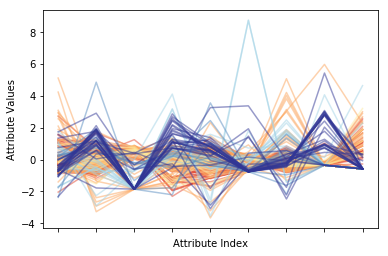

In [8]:
__author__ = 'mike_bowles'
import pandas as pd
from pandas import DataFrame
from pylab import *
import matplotlib.pyplot as plot

target_url = ("https://archive.ics.uci.edu/ml/machine-"
              "learning-databases/glass/glass.data")
glass = pd.read_csv(target_url,header=None, prefix="V")
glass.columns = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si',
                 'K', 'Ca', 'Ba', 'Fe', 'Type']


glassNormalized = glass
ncols = len(glassNormalized.columns)
nrows = len(glassNormalized.index)
summary = glassNormalized.describe()
nDataCol = ncols - 1

#normalize except for labels
for i in range(ncols - 1):
    mean = summary.iloc[1, i]
    sd = summary.iloc[2, i]
    glassNormalized.iloc[:,i:(i + 1)] = \
        (glassNormalized.iloc[:,i:(i + 1)] - mean) / sd

#Plot Parallel Coordinate Graph with normalized values
for i in range(nrows):
    #plot rows of data as if they were series data
    dataRow = glassNormalized.iloc[i,1:nDataCol]
    labelColor = glassNormalized.iloc[i,nDataCol]/7.0
    dataRow.plot(color=plot.cm.RdYlBu(labelColor), alpha=0.5)

plot.xlabel("Attribute Index")
plot.ylabel(("Attribute Values"))
plot.show()

### glassSummary.py

   Id       RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0   1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1   2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2   3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3   4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4   5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1
               Id          RI          Na          Mg          Al          Si  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean   107.500000    1.518365   13.407850    2.684533    1.444907   72.650935   
std     61.920648    0.003037    0.816604    1.442408    0.499270    0.774546   
min      1.000000    1.511150   10.730000    0.000000    0.290000   69.810000   
25%     54.250000    1.516523   12.907500    2.115000    1.190000   72.280000   
50%    107.500000    1.517680   13.300000    3.480000    1.360000   72.790000   
75%    160.750000  

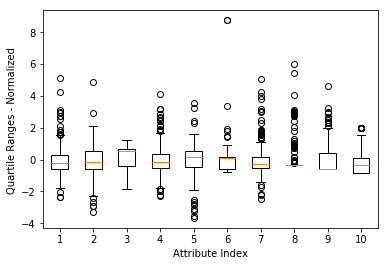

In [9]:
__author__ = 'mike_bowles'
import pandas as pd
from pandas import DataFrame
from pylab import *
import matplotlib.pyplot as plot

target_url = ("https://archive.ics.uci.edu/ml/machine-"
              "learning-databases/glass/glass.data")

glass = pd.read_csv(target_url,header=None, prefix="V")
glass.columns = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si',
                 'K', 'Ca', 'Ba', 'Fe', 'Type']

print(glass.head())

#generate statistical summaries
summary = glass.describe()
print(summary)
ncol1 = len(glass.columns)

glassNormalized = glass.iloc[:, 1:ncol1]
ncol2 = len(glassNormalized.columns)
summary2 = glassNormalized.describe()

for i in range(ncol2):
    mean = summary2.iloc[1, i]
    sd = summary2.iloc[2, i]
    glassNormalized.iloc[:,i:(i + 1)] = \
        (glassNormalized.iloc[:,i:(i + 1)] - mean) / sd

array = glassNormalized.values
boxplot(array)
plot.xlabel("Attribute Index")
plot.ylabel(("Quartile Ranges - Normalized "))
show()

### linePlots.py

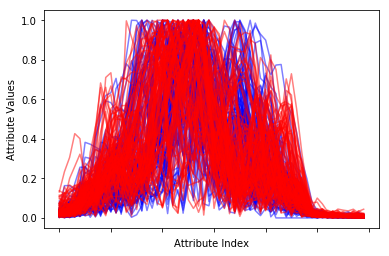

In [10]:
__author__ = 'mike_bowles'
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plot
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-"
"databases/undocumented/connectionist-bench/sonar/sonar.all-data")

#read rocks versus mines data into pandas data frame
rocksVMines = pd.read_csv(target_url,header=None, prefix="V")

for i in range(208):
    #assign color based on color based on "M" or "R" labels
    if rocksVMines.iat[i,60] == "M":
        pcolor = "red"
    else:
        pcolor = "blue"

    #plot rows of data as if they were series data
    dataRow = rocksVMines.iloc[i,0:60]
    dataRow.plot(color=pcolor, alpha=0.5)

plot.xlabel("Attribute Index")
plot.ylabel(("Attribute Values"))
plot.show()

### logitCurve.py

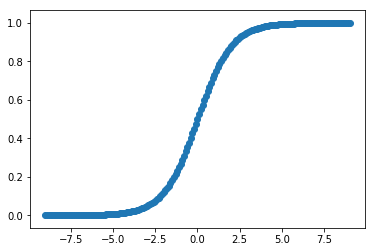

In [11]:
__author__ = 'mike_bowles'
import matplotlib.pyplot as plot
from math import exp

x = [i*0.1 for i in range(-90, 91)]
y = [1.0/(1.0 + exp(-i*0.1)) for i in range(-90, 91)]
plot.scatter(x, y)
plot.show()

### pandasReadSummarize.py

In [12]:
__author__ = 'mike_bowles'
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plot
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-"
"databases/undocumented/connectionist-bench/sonar/sonar.all-data")

#read rocks versus mines data into pandas data frame
rocksVMines = pd.read_csv(target_url,header=None, prefix="V")

#print head and tail of data frame
print(rocksVMines.head())
print(rocksVMines.tail())

#print summary of data frame
summary = rocksVMines.describe()
print(summary)

       V0      V1      V2      V3      V4      V5      V6      V7      V8  \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       V9 ...      V51     V52     V53     V54     V55     V56     V57  \
0  0.2111 ...   0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872 ...   0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194 ...   0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264 ...   0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459 ...   0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

      V58     V59  V60  
0  0.0090  0.0032    R  
1  0.0052  0.0044    R  
2  0.0095  0.0078

### qqplotAttribute.py

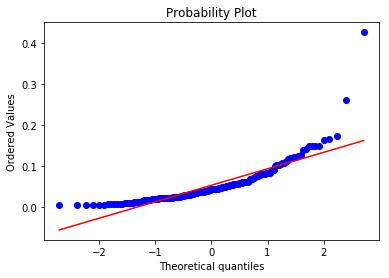

In [13]:
__author__ = 'ubuntu'
import numpy as np
import pylab
import scipy.stats as stats
import urllib.request, urllib.error, urllib.parse
import sys

target_url = ("https://archive.ics.uci.edu/ml/machine-learning-"
"databases/undocumented/connectionist-bench/sonar/sonar.all-data")

data = urllib.request.urlopen(target_url)

#arrange data into list for labels and list of lists for attributes
xList = []
labels = []

for line in data:
    #split on comma
    row = line.strip().decode().split(",")
    xList.append(row)
nrow = len(xList)
ncol = len(xList[1])

type = [0]*3
colCounts = []

#generate summary statistics for column 3 (e.g.)
col = 3
colData = []
for row in xList:
    colData.append(float(row[col]))


stats.probplot(colData, dist="norm", plot=pylab)
pylab.show()

### readPandas.py

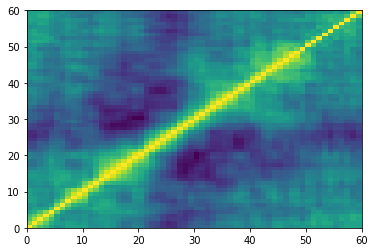

In [14]:
__author__ = 'mike_bowles'
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plot
target_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"

#read rocks versus mines data into pandas data frame
rocksVMines = pd.read_csv(target_url,header=None, prefix="V")

#calculate correlations between real-valued attributes

corMat = DataFrame(rocksVMines.corr())

#visualize correlations using heatmap
plot.pcolor(corMat)
plot.show()

### rockVmineContents.py

In [15]:
__author__ = 'mike_bowles'
import urllib.request, urllib.error, urllib.parse
import sys

#read data from uci data repository
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-"
"databases/undocumented/connectionist-bench/sonar/sonar.all-data")

data = urllib.request.urlopen(target_url)

#arrange data into list for labels and list of lists for attributes
xList = []
labels = []

for line in data:
    #split on comma
    row = line.strip().decode().split(",")
    xList.append(row)
nrow = len(xList)
ncol = len(xList[1])

type = [0]*3
colCounts = []

for col in range(ncol):
    for row in xList:
        try:
            a = float(row[col])
            if isinstance(a, float):
                type[0] += 1
        except ValueError:
            if len(row[col]) > 0:
                type[1] += 1
            else:
                type[2] += 1

    colCounts.append(type)
    type = [0]*3

sys.stdout.write("Col#" + '\t' + "Number" + '\t' +
                 "Strings" + '\t ' + "Other\n")
iCol = 0
for types in colCounts:
    sys.stdout.write(str(iCol) + '\t\t' + str(types[0]) + '\t\t' +
                     str(types[1]) + '\t\t' + str(types[2]) + "\n")
    iCol += 1

Col#	Number	Strings	 Other
0		208		0		0
1		208		0		0
2		208		0		0
3		208		0		0
4		208		0		0
5		208		0		0
6		208		0		0
7		208		0		0
8		208		0		0
9		208		0		0
10		208		0		0
11		208		0		0
12		208		0		0
13		208		0		0
14		208		0		0
15		208		0		0
16		208		0		0
17		208		0		0
18		208		0		0
19		208		0		0
20		208		0		0
21		208		0		0
22		208		0		0
23		208		0		0
24		208		0		0
25		208		0		0
26		208		0		0
27		208		0		0
28		208		0		0
29		208		0		0
30		208		0		0
31		208		0		0
32		208		0		0
33		208		0		0
34		208		0		0
35		208		0		0
36		208		0		0
37		208		0		0
38		208		0		0
39		208		0		0
40		208		0		0
41		208		0		0
42		208		0		0
43		208		0		0
44		208		0		0
45		208		0		0
46		208		0		0
47		208		0		0
48		208		0		0
49		208		0		0
50		208		0		0
51		208		0		0
52		208		0		0
53		208		0		0
54		208		0		0
55		208		0		0
56		208		0		0
57		208		0		0
58		208		0		0
59		208		0		0
60		0		208		0


### rockVmineSummaries.py

In [16]:
__author__ = 'mike_bowles'
import urllib.request, urllib.error, urllib.parse
import sys

#read data from uci data repository
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-"
"databases/undocumented/connectionist-bench/sonar/sonar.all-data")

data = urllib.request.urlopen(target_url)

#arrange data into list for labels and list of lists for attributes
xList = []
labels = []
for line in data:
    #split on comma
    row = line.strip().decode().split(",")
    xList.append(row)

sys.stdout.write("Number of Rows of Data = " + str(len(xList)) + '\n')
sys.stdout.write("Number of Columns of Data = " + str(len(xList[1])))


Number of Rows of Data = 208
Number of Columns of Data = 61

### rVMSummaryStats.py

In [17]:
__author__ = 'mike_bowles'
import urllib.request, urllib.error, urllib.parse
import sys
import numpy as np

#read data from uci data repository
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-"
"databases/undocumented/connectionist-bench/sonar/sonar.all-data")

data = urllib.request.urlopen(target_url)

#arrange data into list for labels and list of lists for attributes
xList = []
labels = []

for line in data:
    #split on comma
    row = line.strip().decode().split(",")
    xList.append(row)
nrow = len(xList)
ncol = len(xList[1])

type = [0]*3
colCounts = []

#generate summary statistics for column 3 (e.g.)
col = 3
colData = []
for row in xList:
    colData.append(float(row[col]))

colArray = np.array(colData)
colMean = np.mean(colArray)
colsd = np.std(colArray)
sys.stdout.write("Mean = " + '\t' + str(colMean) + '\t\t' +
            "Standard Deviation = " + '\t ' + str(colsd) + "\n")


#calculate quantile boundaries
ntiles = 4

percentBdry = []

for i in range(ntiles+1):
    percentBdry.append(np.percentile(colArray, i*(100)/ntiles))

sys.stdout.write("\nBoundaries for 4 Equal Percentiles \n")
print(percentBdry)
sys.stdout.write(" \n")


#run again with 10 equal intervals
ntiles = 10

percentBdry = []

for i in range(ntiles+1):
    percentBdry.append(np.percentile(colArray, i*(100)/ntiles))

sys.stdout.write("Boundaries for 10 Equal Percentiles \n")
print(percentBdry)
sys.stdout.write(" \n")


#The last column contains categorical variables

col = 60
colData = []
for row in xList:
    colData.append(row[col])

unique = set(colData)
sys.stdout.write("Unique Label Values \n")
print(unique)

#count up the number of elements having each value

catDict = dict(zip(list(unique),range(len(unique))))

catCount = [0]*2

for elt in colData:
    catCount[catDict[elt]] += 1

sys.stdout.write("\nCounts for Each Value of Categorical Label \n")
print(list(unique))
print(catCount)

Mean = 	0.053892307692307684		Standard Deviation = 	 0.04641598322260027

Boundaries for 4 Equal Percentiles 
[0.0058, 0.024375, 0.04405, 0.0645, 0.4264]
 
Boundaries for 10 Equal Percentiles 
[0.0058, 0.0141, 0.022740000000000003, 0.027869999999999995, 0.03622, 0.04405, 0.05071999999999999, 0.059959999999999986, 0.07794000000000001, 0.10836, 0.4264]
 
Unique Label Values 
{'M', 'R'}

Counts for Each Value of Categorical Label 
['M', 'R']
[111, 97]


### sampleCorrHeatMap.py

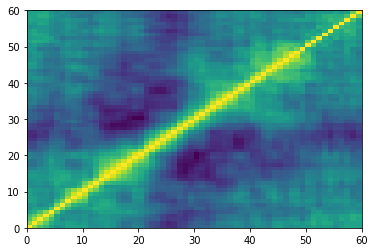

In [18]:
__author__ = 'mike_bowles'
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plot
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-"
"databases/undocumented/connectionist-bench/sonar/sonar.all-data")

#read rocks versus mines data into pandas data frame
rocksVMines = pd.read_csv(target_url,header=None, prefix="V")

#calculate correlations between real-valued attributes

corMat = DataFrame(rocksVMines.corr())

#visualize correlations using heatmap
plot.pcolor(corMat)
plot.show()

### targetCorr.py

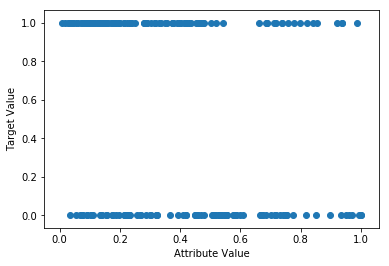

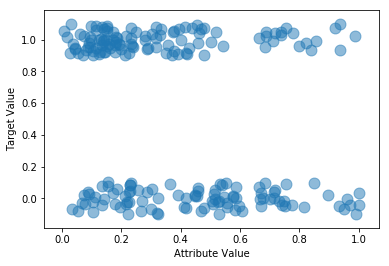

In [19]:
__author__ = 'mike_bowles'
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plot
from random import uniform
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-"
"databases/undocumented/connectionist-bench/sonar/sonar.all-data")

#read rocks versus mines data into pandas data frame
rocksVMines = pd.read_csv(target_url,header=None, prefix="V")

#change the targets to numeric values
target = []
for i in range(208):
    #assign 0 or 1 target value based on "M" or "R" labels
    if rocksVMines.iat[i,60] == "M":
        target.append(1.0)
    else:
        target.append(0.0)

    #plot rows of data as if they were series data
dataRow = rocksVMines.iloc[0:208,35]
plot.scatter(dataRow, target)

plot.xlabel("Attribute Value")
plot.ylabel("Target Value")
plot.show()

#
#To improve the visualization, this version dithers the points a little
# and makes them somewhat transparent
target = []
for i in range(208):
    #assign 0 or 1 target value based on "M" or "R" labels
    # and add some dither
    if rocksVMines.iat[i,60] == "M":
        target.append(1.0 + uniform(-0.1, 0.1))
    else:
        target.append(0.0 + uniform(-0.1, 0.1))

    #plot rows of data as if they were series data
dataRow = rocksVMines.iloc[0:208,35]
plot.scatter(dataRow, target, alpha=0.5, s=120)

plot.xlabel("Attribute Value")
plot.ylabel("Target Value")
plot.show()

### wineCorrHeatMap.py

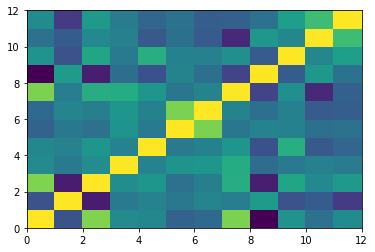

In [20]:
__author__ = 'mike_bowles'
import pandas as pd
from pandas import DataFrame
from pylab import *
import matplotlib.pyplot as plot
from math import exp

target_url = ("http://archive.ics.uci.edu/ml/machine-"
              "learning-databases/wine-quality/winequality-red.csv")
wine = pd.read_csv(target_url,header=0, sep=";")
wineCols = len(wine.columns)

#calculate correlation matrix
corMat = DataFrame(wine.corr())

#visualize correlations using heatmap
plot.pcolor(corMat)
plot.show()

### wineParallelPlot.py

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


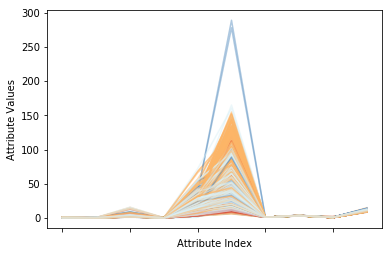

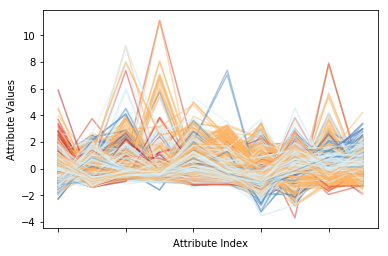

In [21]:
__author__ = 'mike_bowles'
import pandas as pd
from pandas import DataFrame
from pylab import *
import matplotlib.pyplot as plot
from math import exp

target_url = ("http://archive.ics.uci.edu/ml/machine-"
 "learning-databases/wine-quality/winequality-red.csv")

wine = pd.read_csv(target_url,header=0, sep=";")

#print column names in order to have the full versions
print(wine.columns)

#change column names to shorter ones to fit graph
wine.columns = ['fixAcid', 'volAcid', 'citAcid',
    'resSugr', 'chlor', 'frSO2', 'totSO2',
    'dens', 'pH', 'sulpha', 'alcohol', 'quality']

#generate statistical summaries
summary = wine.describe()
nrows = len(wine.index)
tasteCol = len(summary.columns)
meanTaste = summary.iloc[1,tasteCol - 1]
sdTaste = summary.iloc[2,tasteCol - 1]
nDataCol = len(wine.columns) -1

for i in range(nrows):
    #plot rows of data as if they were series data
    dataRow = wine.iloc[i,1:nDataCol]
    normTarget = (wine.iloc[i,nDataCol] - meanTaste)/sdTaste
    labelColor = 1.0/(1.0 + exp(-normTarget))
    dataRow.plot(color=plot.cm.RdYlBu(labelColor), alpha=0.5)

plot.xlabel("Attribute Index")
plot.ylabel(("Attribute Values"))
plot.show()

wineNormalized = wine
ncols = len(wineNormalized.columns)

for i in range(ncols):
    mean = summary.iloc[1, i]
    sd = summary.iloc[2, i]
    wineNormalized.iloc[:,i:(i + 1)] = \
        (wineNormalized.iloc[:,i:(i + 1)] - mean) / sd

#Try again with normalized values
for i in range(nrows):
    #plot rows of data as if they were series data
    dataRow = wineNormalized.iloc[i,1:nDataCol]
    normTarget = wineNormalized.iloc[i,nDataCol]
    labelColor = 1.0/(1.0 + exp(-normTarget))
    dataRow.plot(color=plot.cm.RdYlBu(labelColor), alpha=0.5)

plot.xlabel("Attribute Index")
plot.ylabel(("Attribute Values"))
plot.show()

### wineSummary.py

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

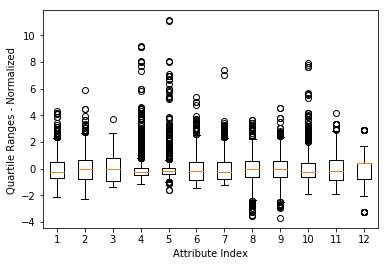

In [22]:
__author__ = 'mike_bowles'
import pandas as pd
from pandas import DataFrame
from pylab import *
import matplotlib.pyplot as plot

target_url = ("http://archive.ics.uci.edu/ml/machine-"
 "learning-databases/wine-quality/winequality-red.csv")

wine = pd.read_csv(target_url,header=0, sep=";")

print(wine.head())

#generate statistical summaries
summary = wine.describe()
print(summary)

wineNormalized = wine
ncols = len(wineNormalized.columns)

for i in range(ncols):
    mean = summary.iloc[1, i]
    sd = summary.iloc[2, i]
    wineNormalized.iloc[:,i:(i + 1)] = \
        (wineNormalized.iloc[:,i:(i + 1)] - mean) / sd

array = wineNormalized.values
boxplot(array)
plot.xlabel("Attribute Index")
plot.ylabel(("Quartile Ranges - Normalized "))
show()